Data Ingesiton

Eda of the data

processing of the data

model building

model evalution

# Data Ingestion
Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.

In [1]:
import pandas as pd
pd.read_csv('TSLA.CSV')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


Univariate time series

Multivariate time sries

In [2]:
data = pd.read_csv('TSLA.CSV')

In [3]:
#univariate time series analysis
stock_data = data[["Date","Close"]]

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [5]:
stock_data.Date = pd.to_datetime(stock_data.Date)

C:\Users\bharg\AppData\Local\Temp\ipykernel_14648\700168216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.Date = pd.to_datetime(stock_data.Date)


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [7]:
#set datetime column and se as index column
stock_data = stock_data.set_index('Date')

# why we are converting date column as a index column

i can easily retrive the data

visulization is also simple

those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [8]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [9]:
import numpy as np
import matplotlib.pyplot as plt

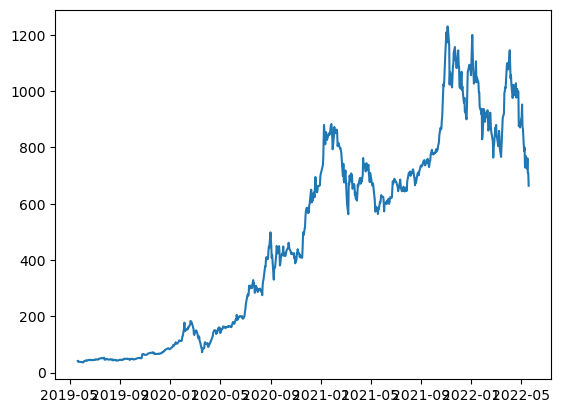

In [10]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

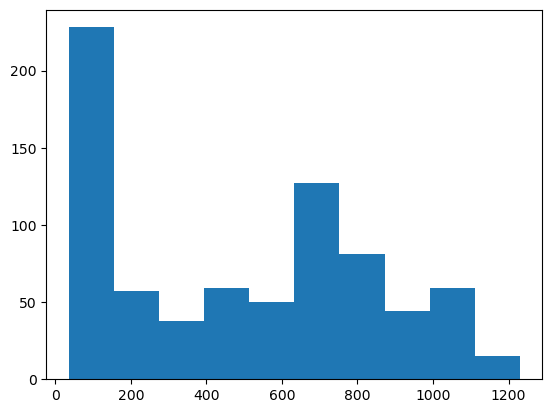

In [11]:
plt.hist(stock_data.Close)

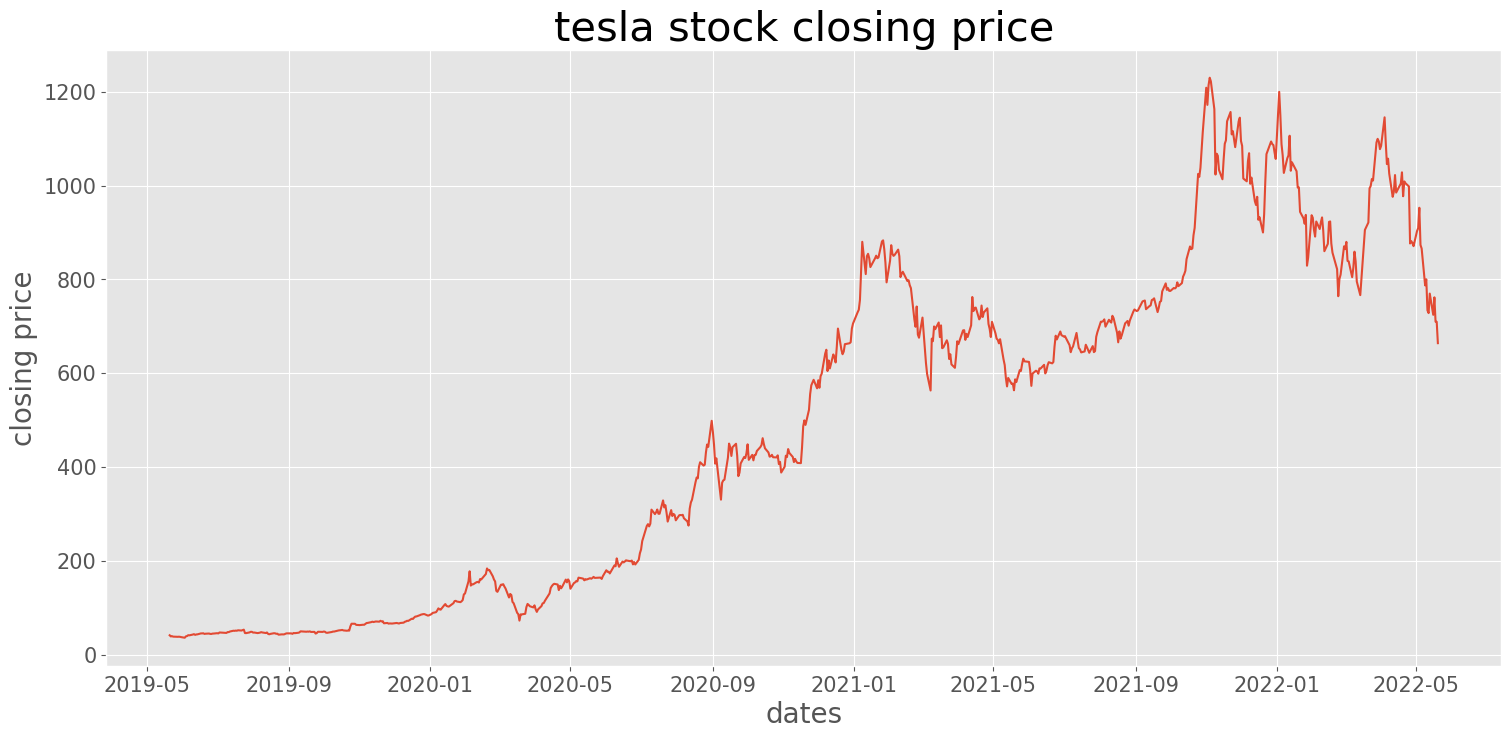

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('dates',fontsize = 20)
plt.xticks(fontsize = 15)
plt.plot(stock_data.Close)
plt.yticks(fontsize = 15)
plt.ylabel('closing price',fontsize = 20)
plt.title("tesla stock closing price", fontsize = 30)
plt.show()

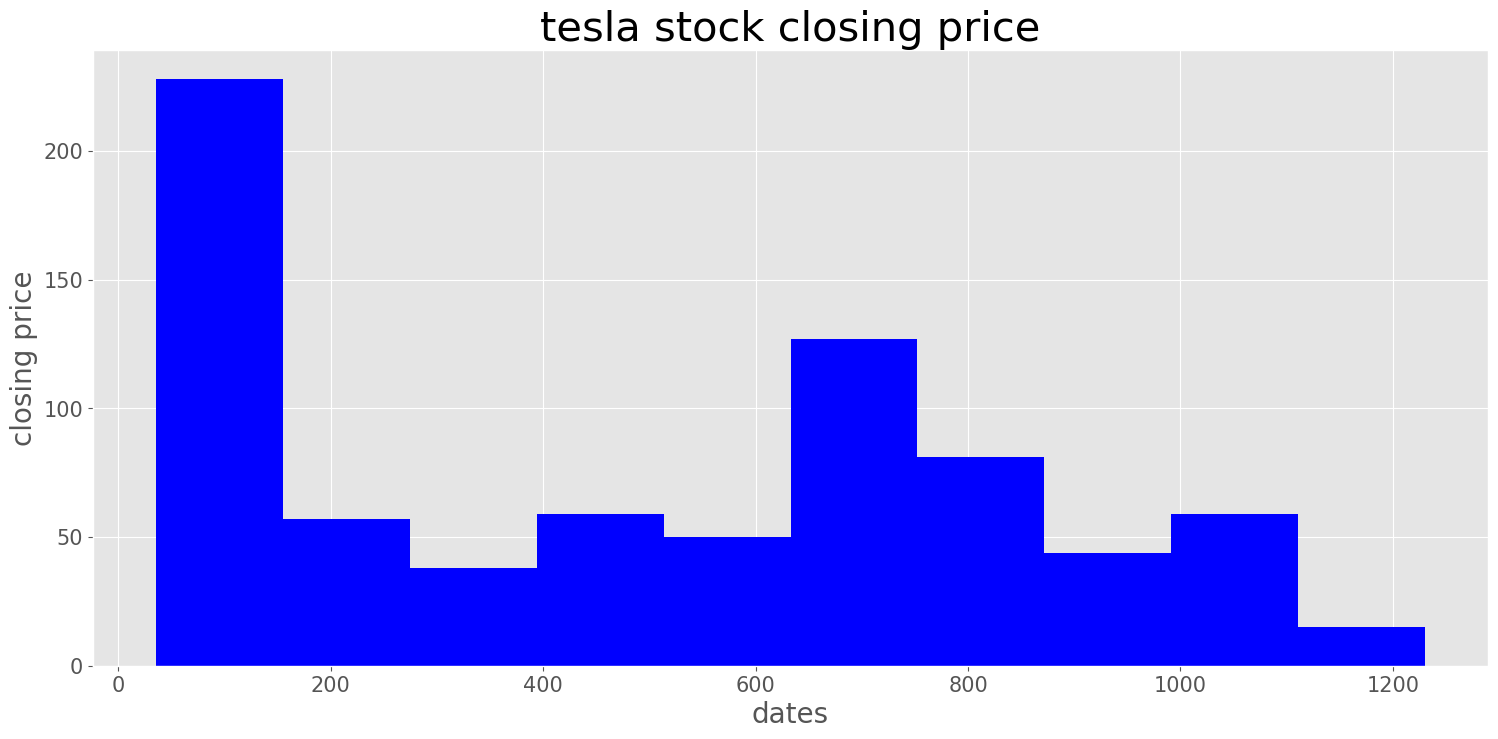

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('dates',fontsize = 20)
plt.xticks(fontsize = 15)
plt.hist(stock_data.Close, linewidth = 3, color = 'blue')
plt.yticks(fontsize = 15)
plt.ylabel('closing price',fontsize = 20)
plt.title("tesla stock closing price", fontsize = 30)
plt.show()

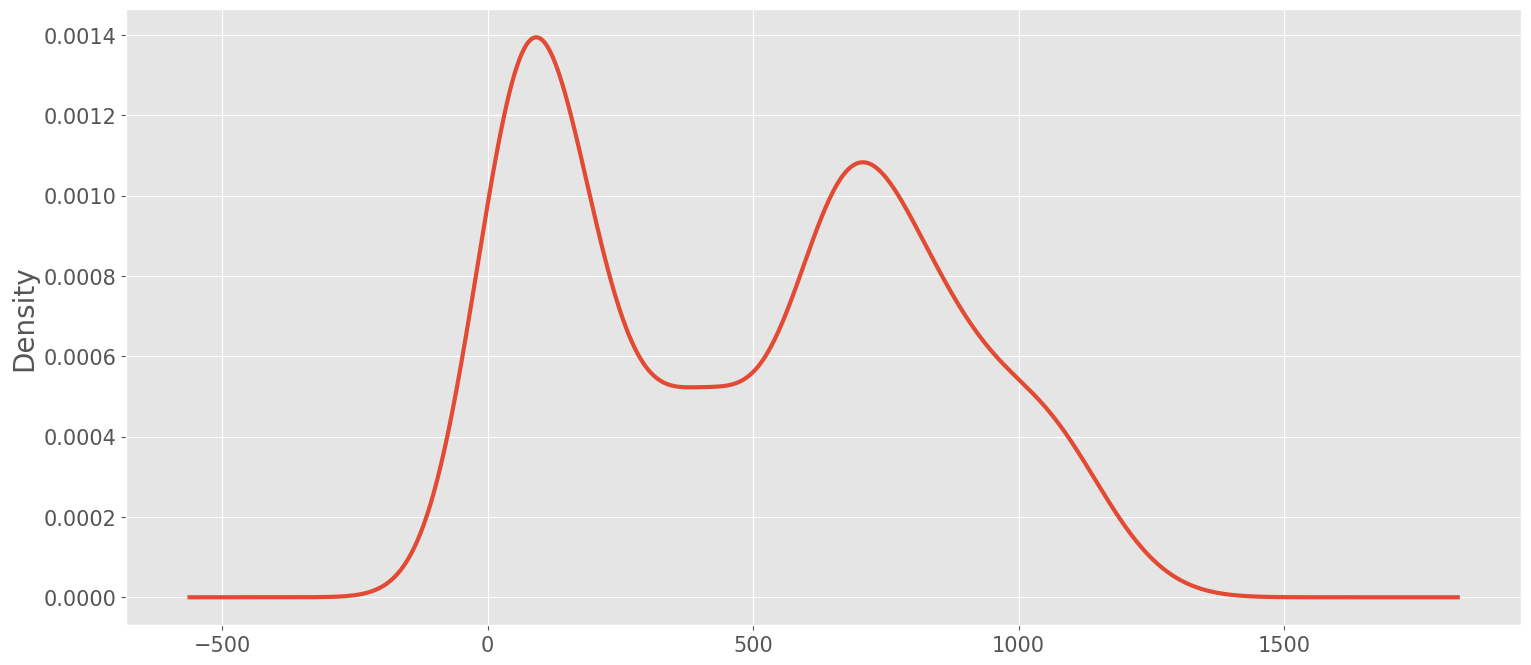

In [14]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [15]:
stock_data.Close.rolling(12) # window size = 12

Rolling [window=12,center=False,axis=0,method=single]

In [16]:
stock_data.Close.rolling(12).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [17]:
stock_data.Close.rolling(3).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [18]:
stock_data.Close.rolling(3).std()

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

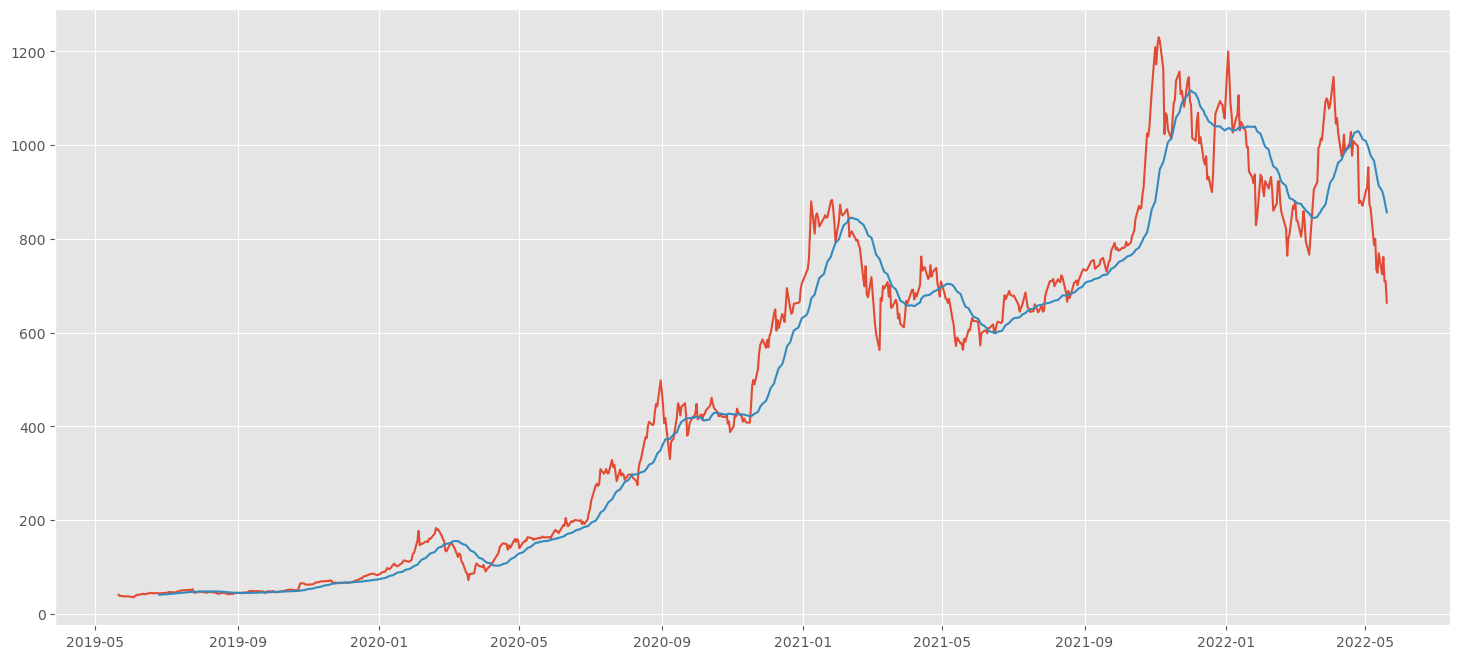

In [19]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(stock_data.Close.rolling(25).mean())

In [20]:
# to check stationary of data we adfuller test

from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [21]:
adft  # dict having % is C.I 

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [22]:
pd.Series(adft[0:4], index = ['test stats', 'p-value', 'lag', 'data point'])

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [23]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

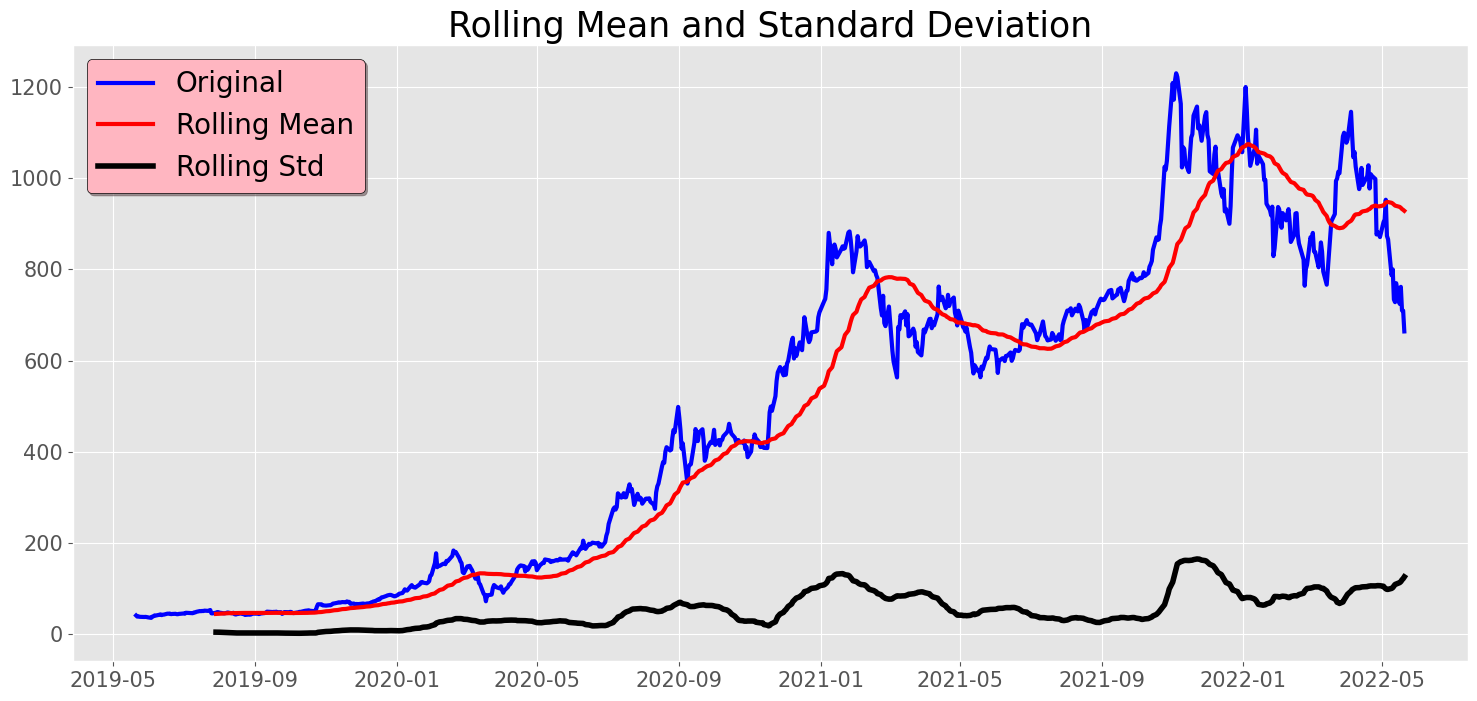

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [24]:
test_stationarity(stock_data.Close)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
result = seasonal_decompose(stock_data.Close, period= 30) #default additive components time series

<Figure size 2000x1000 with 0 Axes>

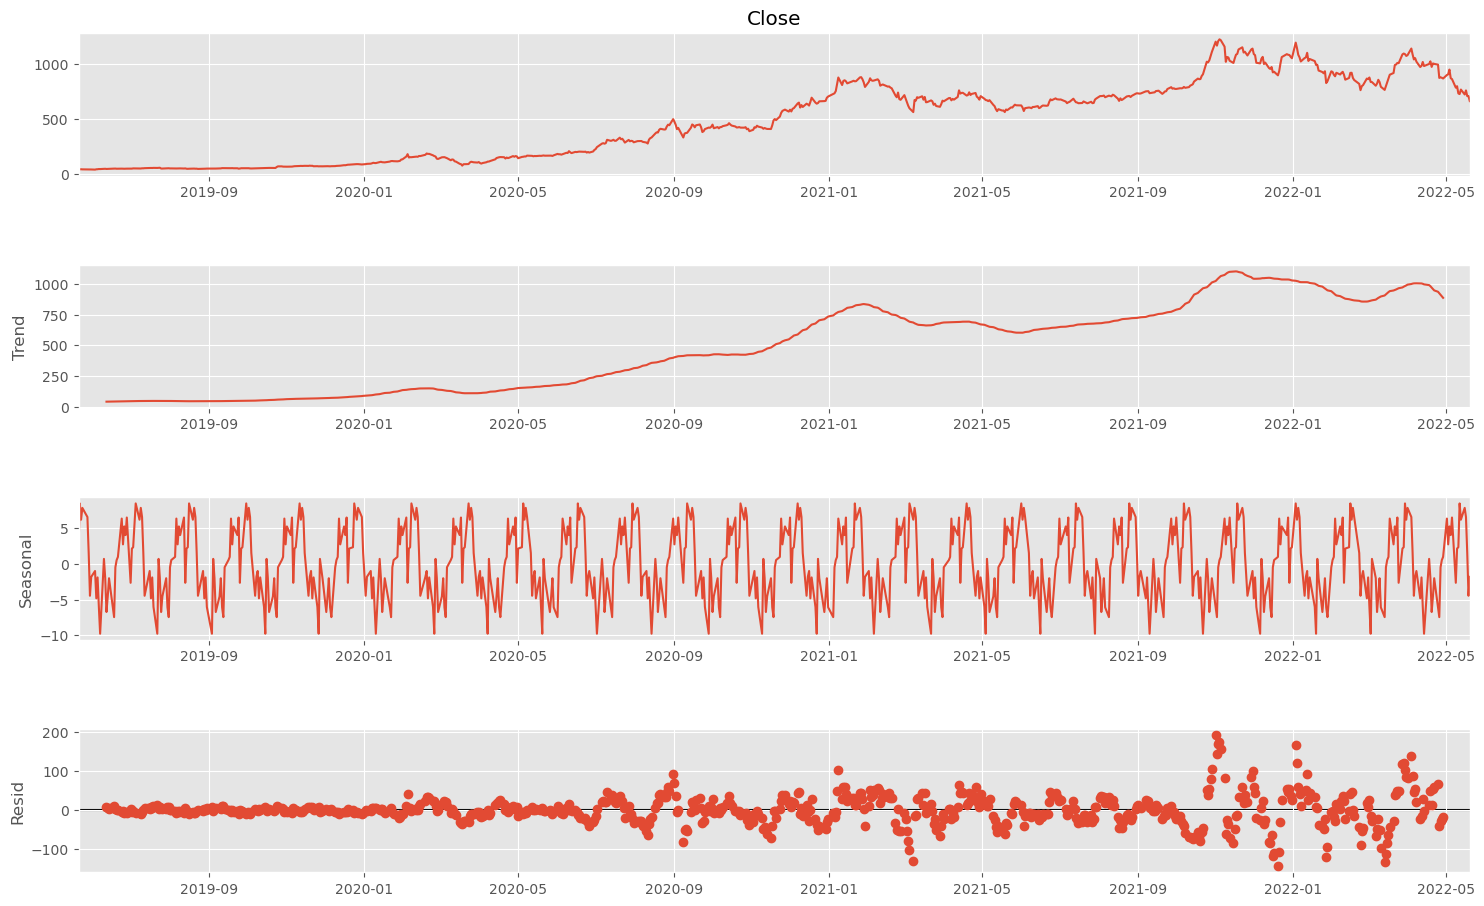

In [27]:
plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

In [28]:
result.seasonal

Date
2019-05-21    2.317701
2019-05-22    8.439826
2019-05-23    6.163890
2019-05-24    7.817719
2019-05-28    6.539408
                ...   
2022-05-16    7.817719
2022-05-17    6.539408
2022-05-18    1.508873
2022-05-19   -4.468046
2022-05-20   -1.826385
Name: seasonal, Length: 758, dtype: float64

In [29]:
result = seasonal_decompose(stock_data.Close,model = 'mutliplicative' , period= 30)

<Figure size 2000x1000 with 0 Axes>

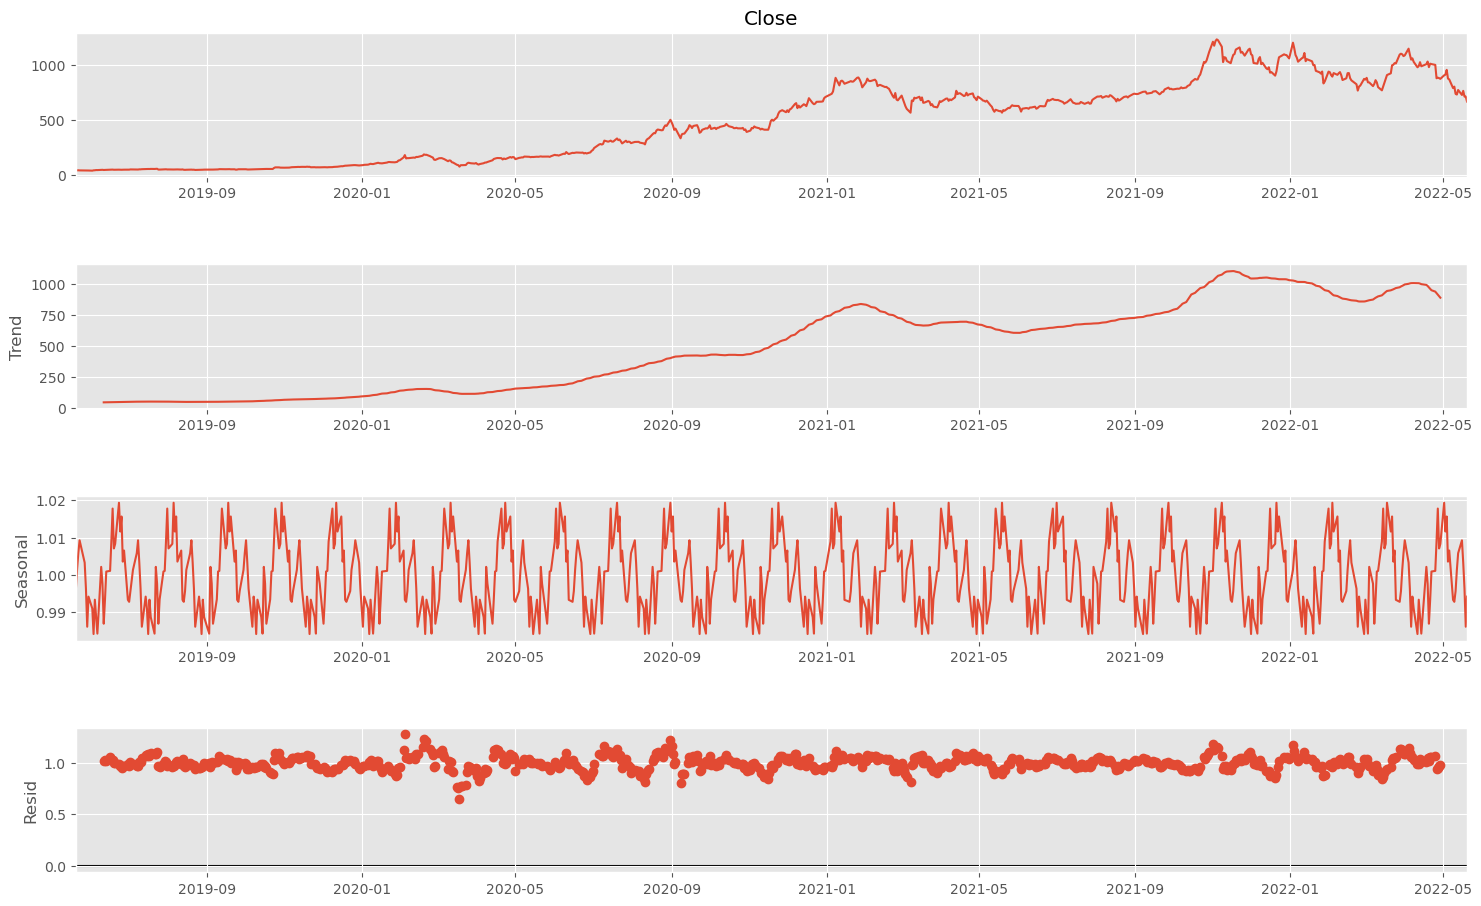

In [30]:
plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

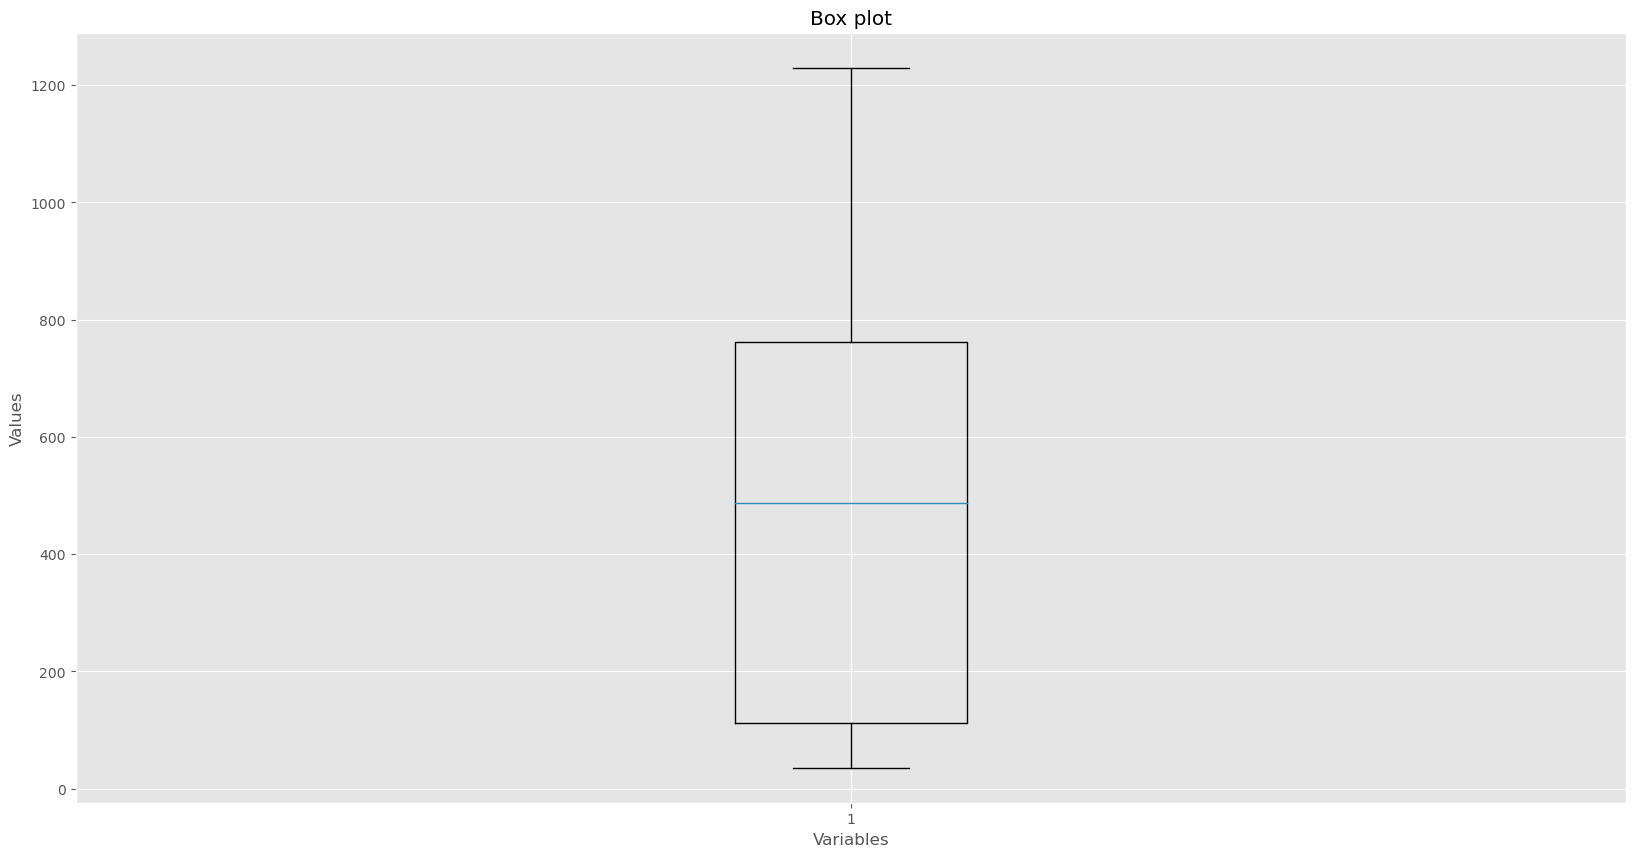

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"]) # to check outliers
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

C:\Users\bharg\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


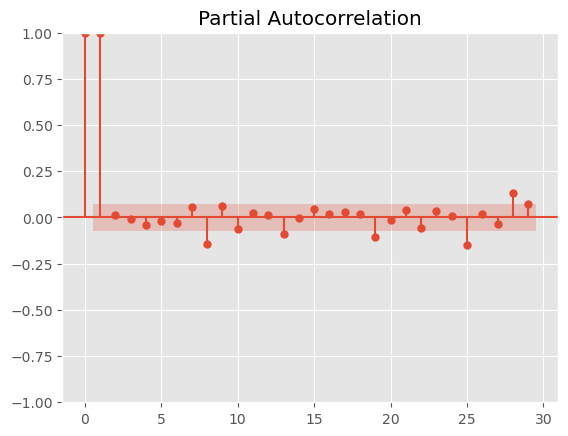

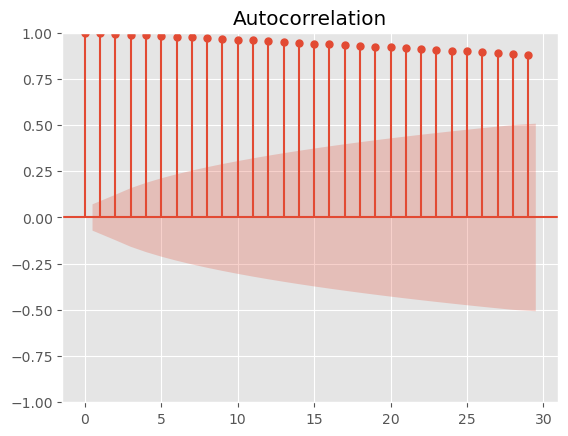

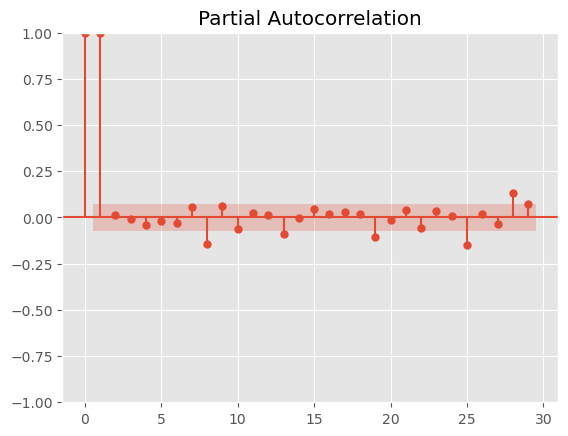

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [33]:
df_close= stock_data.Close

In [34]:
df_close.diff() #1st difference

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [35]:
df_close.diff(2) # it is nothing but diff on 1st difference

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

In [36]:
tsla_close_diff = df_close.diff()

In [37]:
tsla_close_diff  = tsla_close_diff.dropna()

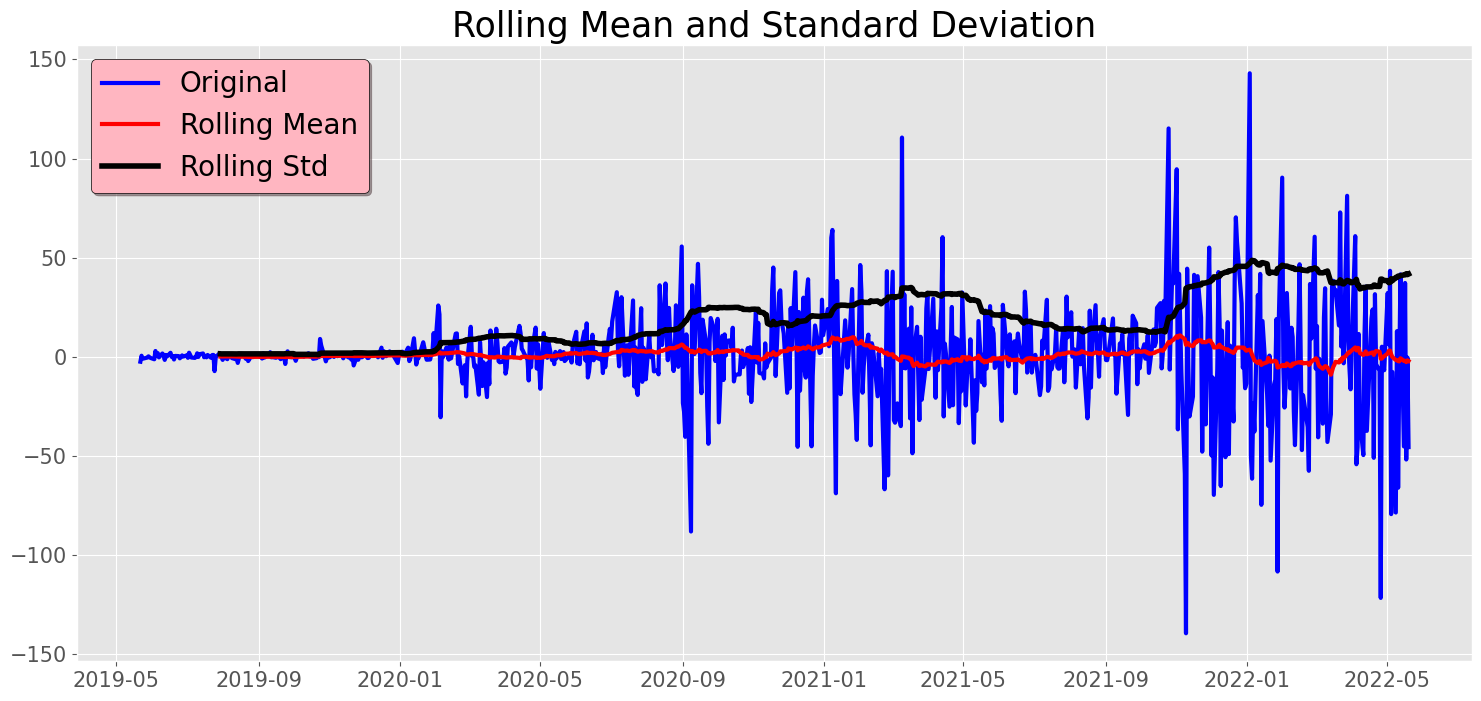

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [38]:
test_stationarity(tsla_close_diff) #the p value is  3.498786e-13 <0.05 i.e rejectv the null hypothesis
                                    #i.e data is stationary

In [39]:
tsla_close_diff2 = df_close.diff(2)

In [40]:
tsla_close_diff2

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

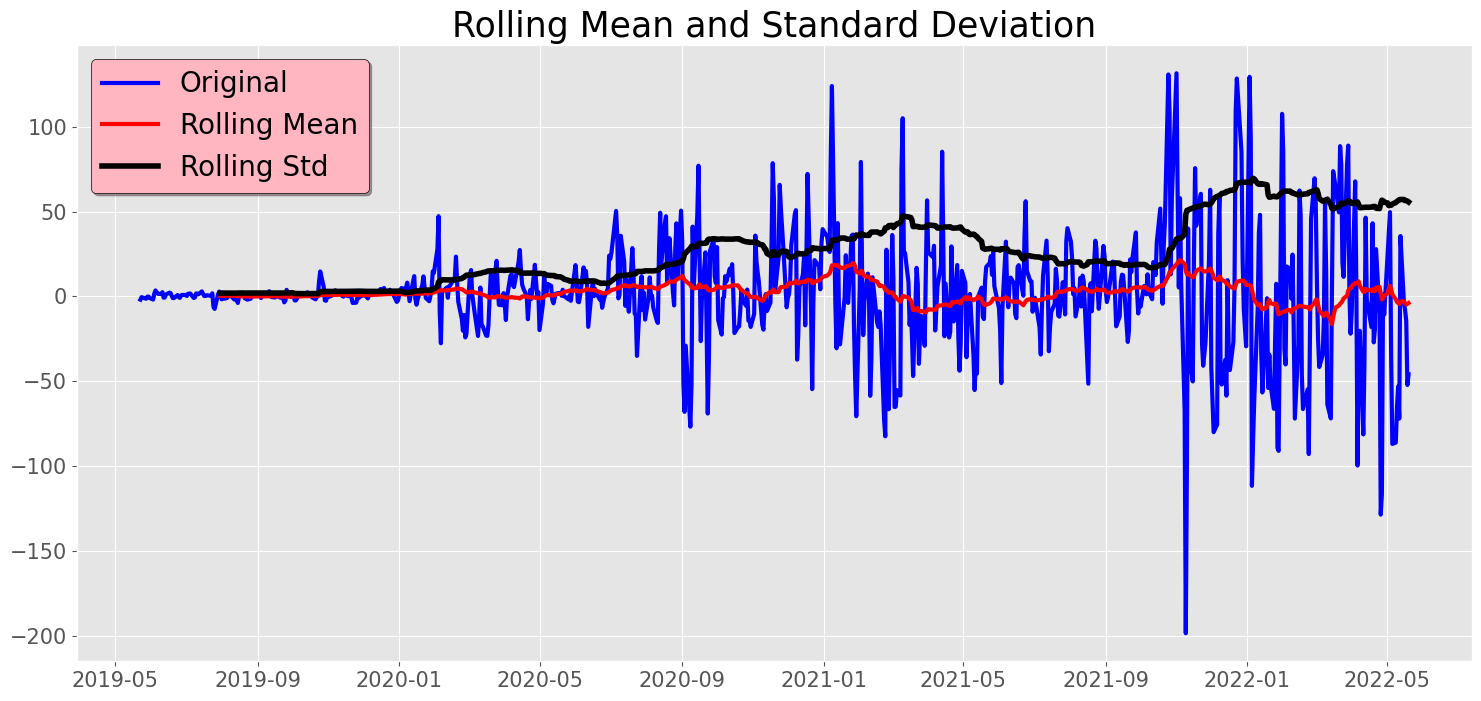

Results of dickey fuller test
Test Statistics               -6.027267e+00
p-value                        1.445919e-07
No. of lags used               1.700000e+01
Number of observations used    7.380000e+02
critical value (1%)           -3.439242e+00
critical value (5%)           -2.865464e+00
critical value (10%)          -2.568860e+00
dtype: float64


In [41]:
test_stationarity(tsla_close_diff2.dropna())

In [42]:
train_data = df_close[0:-60]
test_data = df_close[-60:]


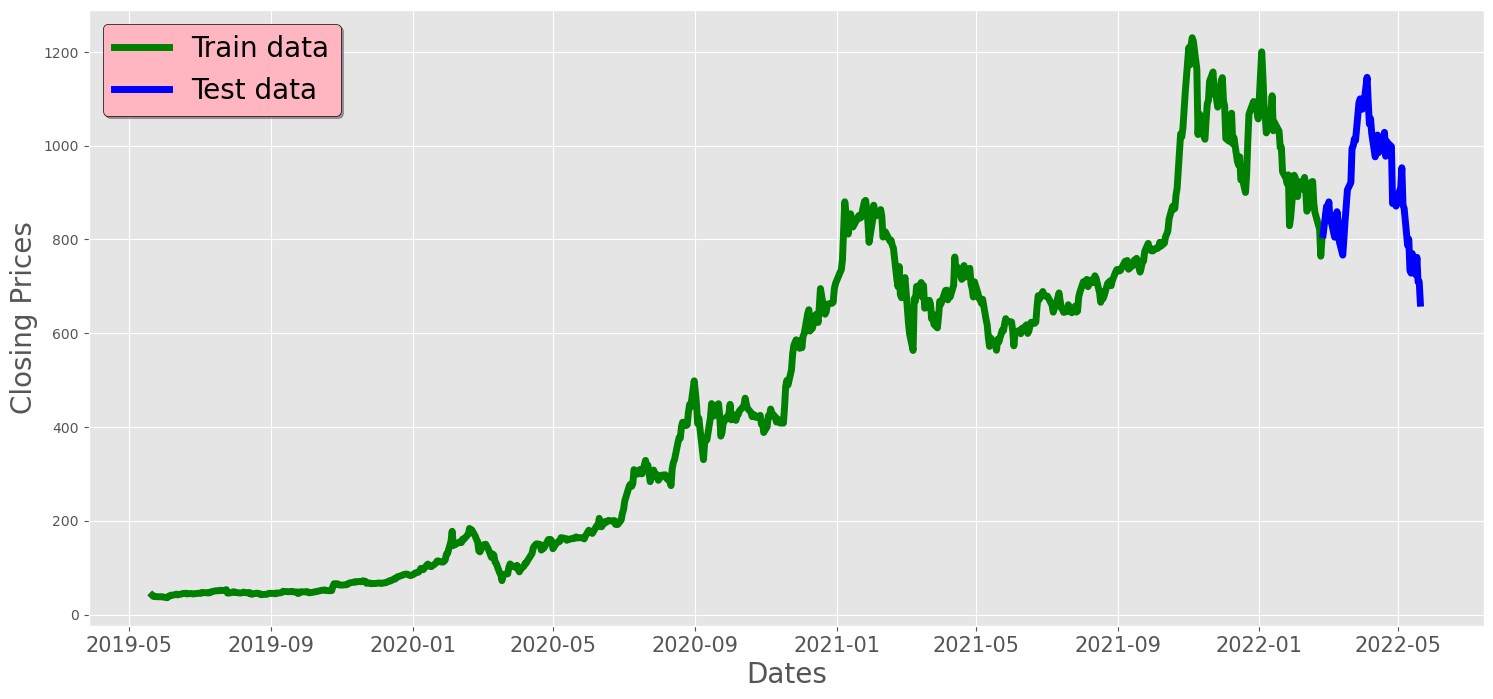

In [43]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
history = [x for x in train_data]

In [46]:
model = ARIMA(history, order= (1,1,1))
'''order= (1,1,1) (p,d,q)
Auto Regressive: Lag decide from  PACF graph
Integrated :Lag from  differencing where the data is stationary
moving average: Lag from ACF

For SARIMA: S:Seasonal factor ==> (p,d,q) (P,D,Q,X)  where x is seasonal factor
'''

'order= (1,1,1)\nAuto Regressive: Lag decide from  PACF graph\nIntegrated :Lag from  differencing where the data is stationary\nmoving average: Lag from ACF\n'

In [47]:
model = model.fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 20 Jun 2023   AIC                           6306.700
Time:                        16:26:29   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model.forecast()[0]

800.2043836664329

In [50]:
test_data[0]

809.8699951171875

In [51]:
mean_squared_error([test_data[0]], [model.forecast()[0]])

93.42404471695782

In [55]:
model.forecast()[0:10]

array([800.20438367])

In [56]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [57]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [58]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=158.252
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.658
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.733
Best ARIMA(2, 0, 0) RMSE=39.440


In [79]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history, order= (2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    #conf_list.append(conf)
    history.append(test_data[t])
print('rmse: ', np.sqrt(mean_squared_error(test_data, predictions)))

rmse:  39.43995815807644


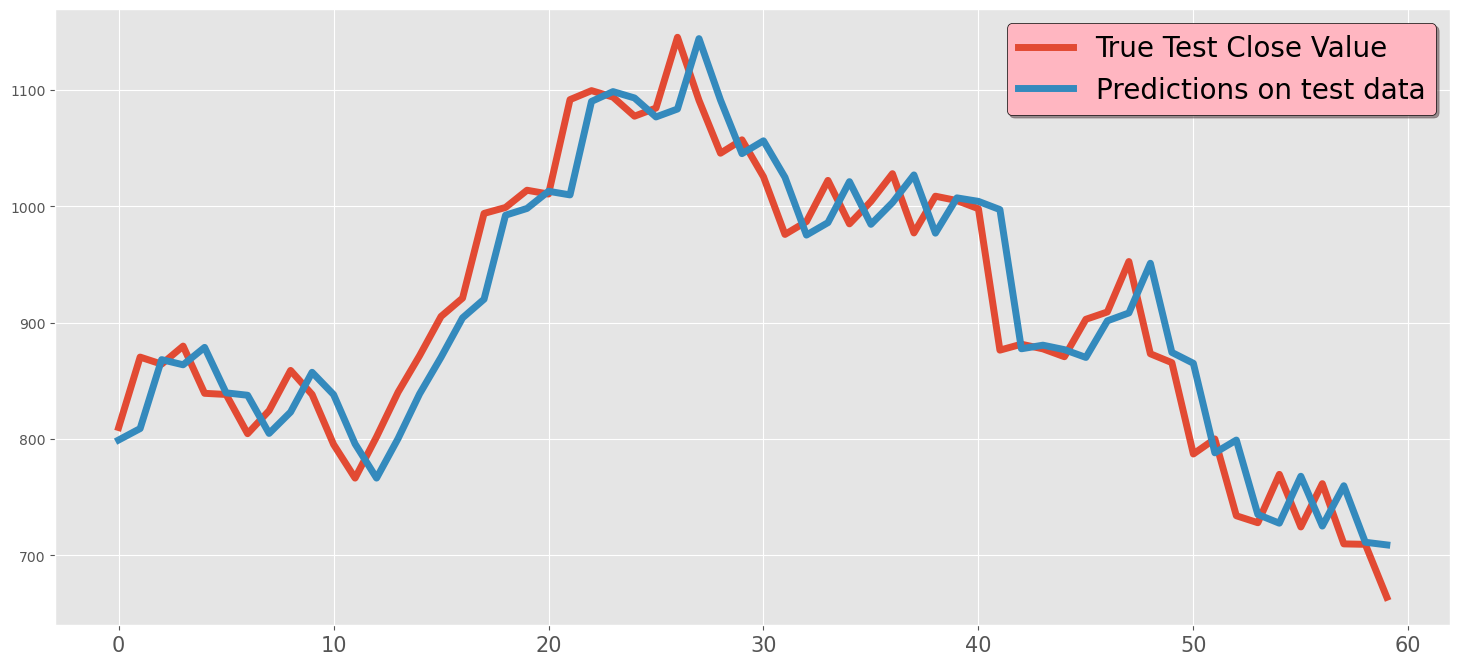

In [80]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [65]:
import statsmodels.api as sm

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order= (2,0,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    #conf_list.append(conf)
    history.append(test_data[t])
print('rmse: ', np.sqrt(mean_squared_error(test_data, predictions)))

rmse:  39.68470548158455


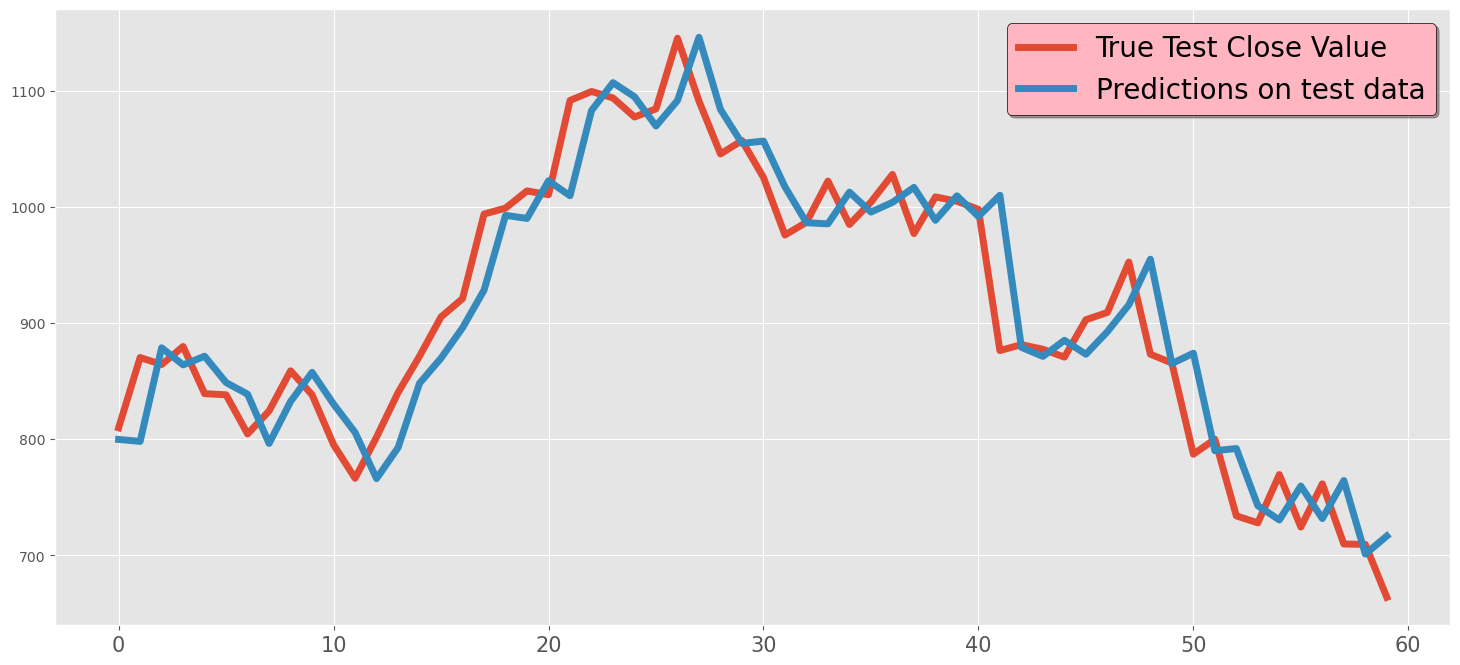

In [66]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

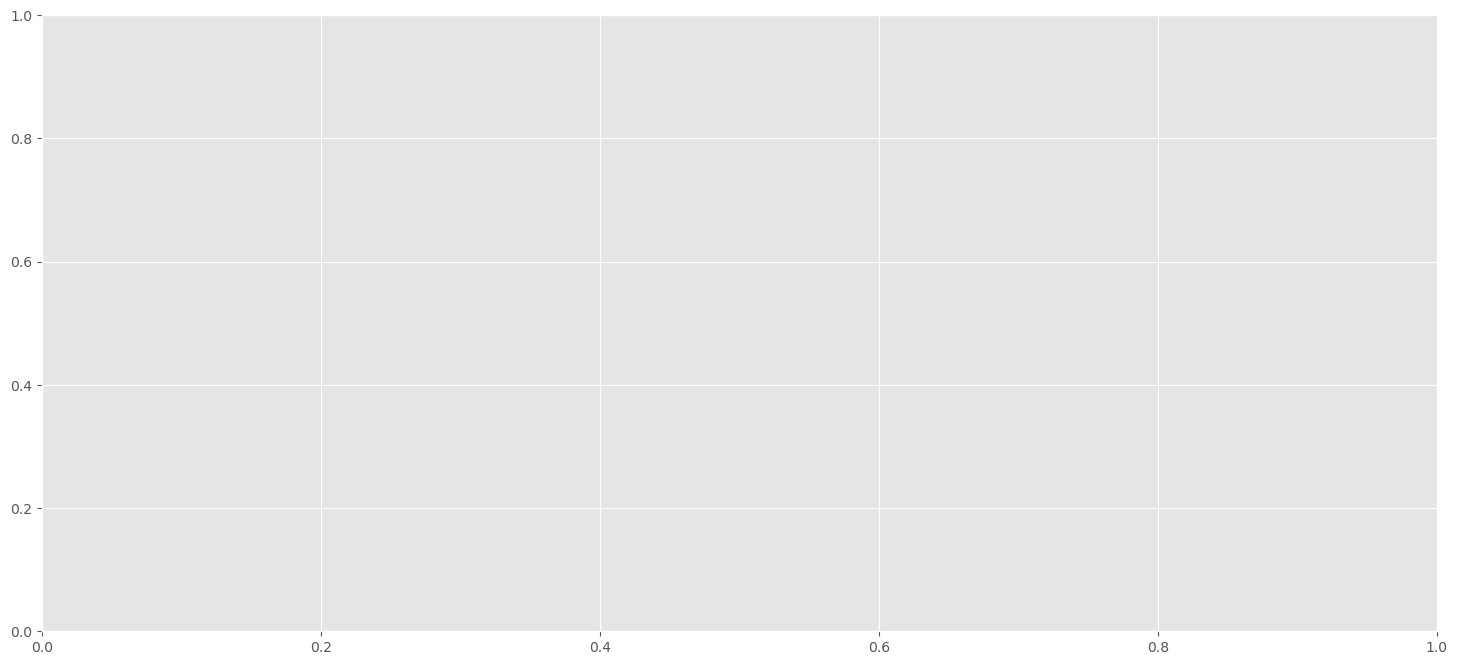

In [83]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
model_fit.plot_predict(start=1,end=len(df_close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()

In [85]:
#instead of using plot predict use get forecast and plot those esamples